In [10]:
import sys
from pynest import Sampler
import numpy as np
import matplotlib.pyplot as plt
import pymultinest
def simulate_data(a,b,n):
    x = np.linspace(0,10,n)
    y = a*x + b + np.random.normal(loc=0,scale=10,size=n)
    return x,y

x, y = simulate_data(5,10,100)

def log_gaussian(x, mu, sig):
    return np.log(1/np.sqrt(2 * np.pi * sig**2.0))  +  (-0.5/sig**2.0) * (x - mu)**2.0

def myloglike(cube,ndim,nparams):
    log_likelihood = 0
    for i in tuple(zip(x,y)):
        log_likelihood += log_gaussian(i[1], cube[0]*i[0] + cube[1], 10)
    return log_likelihood

def myprior(cube,ndim,nparams):
    cube[0] = cube[0] * 10
    cube[1] = cube[1] * 20
    return cube

def test_mcmc_instantation():
    sampler = Sampler(log_likelihood=myloglike, prior=myprior, ndim = 2, sample_method = 'mcmc')
    sampler.sample()



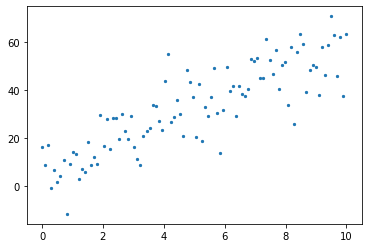

In [2]:
plt.scatter(x,y,s=5)

In [3]:
param1 = np.linspace(0,20,100)
param1_likval = [myloglike([5,param]) for param in param1]

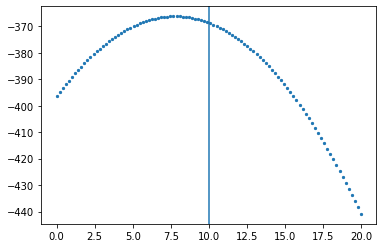

In [4]:
plt.scatter(param1,param1_likval,s=5)
plt.axvline(10)

In [5]:
param2 = np.linspace(0,10,100)
param2_likval = [myloglike([param,10]) for param in param2]

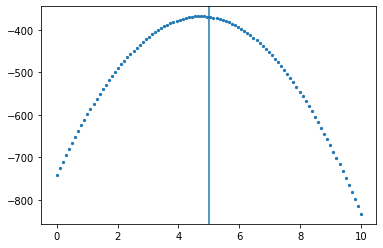

In [6]:
plt.scatter(param2,param2_likval,s=5)
plt.axvline(5)

In [7]:
np.random.normal(loc=0,scale=10)

-10.854615778389483

In [8]:
sampler = Sampler(log_likelihood=myloglike, prior=myprior, ndim = 2, sample_method = 'mcmc')
sampler.sample()

cube [0.3441158281951985, 0.2309591400377099] [3.441158281951985, 4.6191828007541975]
-366.1783584336433 -5.992714286691313 -372.1710727203346
9.348879021869488e-160 0.0024968776025399153 2.3343006638561196e-162
Log Evidence: 0


In [12]:
pymultinest.run(myloglike, myprior, 2, outputfiles_basename='./2-',resume = False, verbose = True)